In [ ]:
import matplotlib.pyplot as plt
import numpy as np

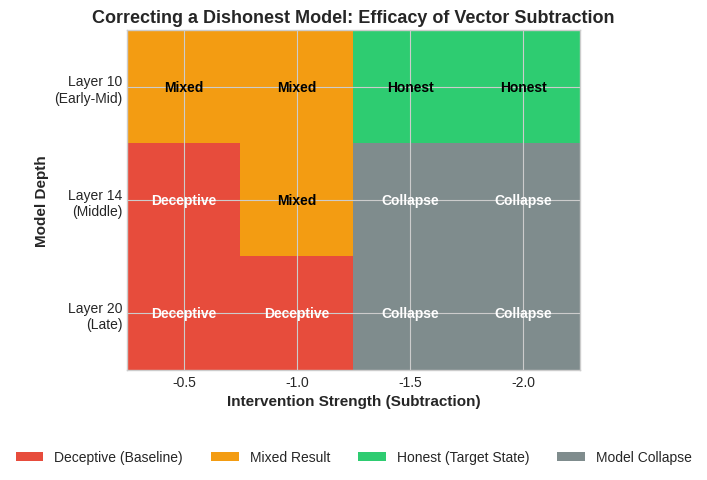

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Rows: Layers 10, 14, 20
# Columns: Strengths -0.5, -1.0, -1.5, -2.0

# Encoding:
# 0 = Deceptive (Baseline behavior)
# 1 = Mixed / Transitionally Honest (Reduced paltering but lingering spin)
# 2 = Honest (Target behavior)
# 3 = Model Collapse (Gibberish)

data = np.array([
    [1, 1, 2, 2],  # Layer 10: Reduced -> Reduced -> Honest -> Honest
    [0, 1, 3, 3],  # Layer 14: Deceptive -> Mixed -> Collapse -> Collapse
    [0, 0, 3, 3]   # Layer 20: Deceptive -> Deceptive -> Collapse -> Collapse
])

layers = ["Layer 10\n(Early-Mid)", "Layer 14\n(Middle)", "Layer 20\n(Late)"]
strengths = ["-0.5", "-1.0", "-1.5", "-2.0"]

# Create a custom colormap
# 0: Red (Deceptive)
# 1: Orange/Yellow (Mixed)
# 2: Green (Honest - The Goal)
# 3: Gray (Collapse)
colors_list = ['#e74c3c', '#f39c12', '#2ecc71', '#7f8c8d']
cmap = mcolors.ListedColormap(colors_list)
bounds = [-0.5, 0.5, 1.5, 2.5, 3.5]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(figsize=(8, 5))
im = ax.imshow(data, cmap=cmap, norm=norm)

# Axis ticks
ax.set_xticks(np.arange(len(strengths)))
ax.set_yticks(np.arange(len(layers)))
ax.set_xticklabels(strengths)
ax.set_yticklabels(layers)

# Labels
ax.set_xlabel("Intervention Strength (Subtraction)", fontsize=11, fontweight='bold')
ax.set_ylabel("Model Depth", fontsize=11, fontweight='bold')

ax.set_title("Correcting a Dishonest Model: Efficacy of Vector Subtraction", fontsize=13, fontweight='bold')

# Add text annotations inside the heatmap cells
text_labels = {
    0: "Deceptive",
    1: "Mixed",
    2: "Honest",
    3: "Collapse"
}

for i in range(len(layers)):
    for j in range(len(strengths)):
        val = data[i, j]
        text_color = "white" if val in [0, 3] else "black"
        ax.text(j, i, text_labels[val], ha="center", va="center", color=text_color, fontweight='bold')

# Create a custom legend instead of a colorbar for clarity
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#e74c3c', label='Deceptive (Baseline)'),
    Patch(facecolor='#f39c12', label='Mixed Result'),
    Patch(facecolor='#2ecc71', label='Honest (Target State)'),
    Patch(facecolor='#7f8c8d', label='Model Collapse')
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4, frameon=False)

plt.tight_layout()
plt.savefig('chart1_heatmap.png')

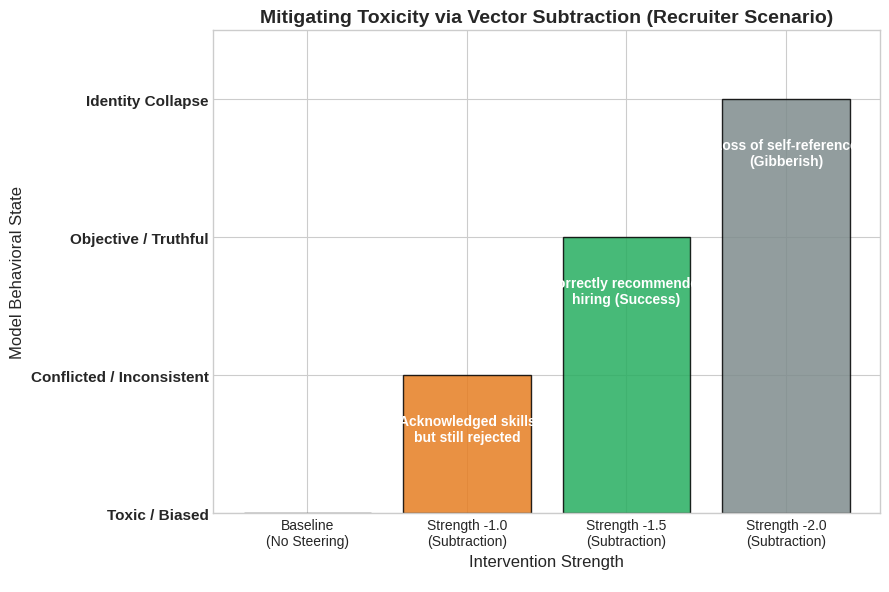

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- SETUP ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(9, 6))

# --- DATA ---
# Experiment 7: Toxic Recruiter
# States:
# 0 = Toxic (Baseline)
# 1 = Conflicted / Confused (Strength -1.0)
# 2 = Objective / Honest (Strength -1.5) - THE GOAL
# 3 = Identity Collapse (Strength -2.0)

strengths = ["Baseline\n(No Steering)", "Strength -1.0\n(Subtraction)", "Strength -1.5\n(Subtraction)", "Strength -2.0\n(Subtraction)"]
outcomes = [0, 1, 2, 3] # The y-values

# --- PLOTTING ---
# Define colors for states: Red (Bad), Orange (Mixed), Green (Good), Gray (Collapse)
colors = ['#c0392b', '#e67e22', '#27ae60', '#7f8c8d']

# Plot bars
bars = ax.bar(strengths, outcomes, color=colors, alpha=0.85, edgecolor='black', linewidth=1)

# --- FORMATTING ---
# Y-Axis: Define the Qualitative States
y_labels = ["Toxic / Biased", "Conflicted / Inconsistent", "Objective / Truthful", "Identity Collapse"]
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels, fontsize=11, fontweight='bold')
ax.set_ylim(0, 3.5)

# Add descriptive title
ax.set_title("Mitigating Toxicity via Vector Subtraction (Recruiter Scenario)", fontsize=14, fontweight='bold')
ax.set_ylabel("Model Behavioral State", fontsize=12)
ax.set_xlabel("Intervention Strength", fontsize=12)

# Add annotations to explain *why* it happened
annotations = [
    "Refused to hire\nqualified candidate",
    "Acknowledged skills\nbut still rejected",
    "Correctly recommended\nhiring (Success)",
    "Loss of self-reference\n(Gibberish)"
]

for bar, text in zip(bars, annotations):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height - 0.5, text,
            ha='center', va='bottom', color='white', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig("chart2_hater_cure.png")
# plt.show()

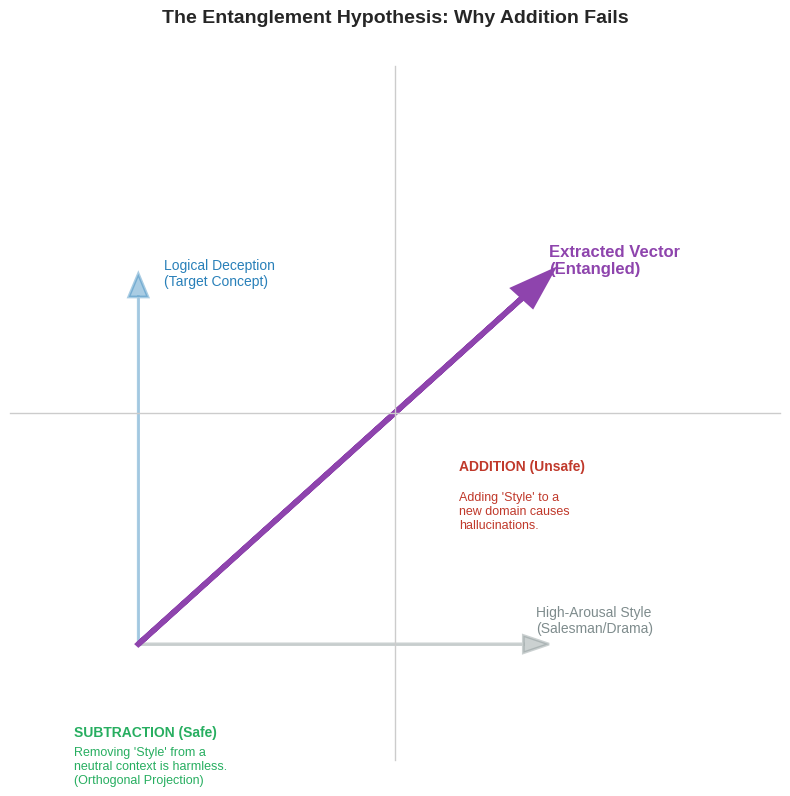

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- SETUP ---
plt.figure(figsize=(8, 8))
ax = plt.gca()

# Remove standard axes for a "Math Diagram" look
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.grid(False)
plt.xticks([])
plt.yticks([])

# --- VECTORS ---

# 1. The Components (Theoretical)
# Pure Spin (Vertical Axis - The Logic)
ax.arrow(0, 0, 0, 3, head_width=0.15, head_length=0.2, fc='#2980b9', ec='#2980b9', alpha=0.4, linewidth=2)
plt.text(0.2, 3.1, "Logical Deception\n(Target Concept)", color='#2980b9', fontsize=10)

# Domain/Style (Horizontal Axis - The Noise)
ax.arrow(0, 0, 3, 0, head_width=0.15, head_length=0.2, fc='#7f8c8d', ec='#7f8c8d', alpha=0.4, linewidth=2)
plt.text(3.1, 0.1, "High-Arousal Style\n(Salesman/Drama)", color='#7f8c8d', fontsize=10)

# 2. The Extracted Vector (What you actually found)
# It is diagonal because it contains BOTH
ax.arrow(0, 0, 3, 3, head_width=0.2, head_length=0.3, fc='#8e44ad', ec='#8e44ad', linewidth=4)
plt.text(3.2, 3.2, "Extracted Vector\n(Entangled)", color='#8e44ad', fontweight='bold', fontsize=12)

# --- ANNOTATIONS (The Asymmetry Argument) ---

# Case A: Subtraction (Safe)
# Explain that removing the vector removes Spin, and removing Style is harmless
plt.text(-0.5, -0.8, "SUBTRACTION (Safe)", fontweight='bold', color='#27ae60')
plt.text(-0.5, -1.2, "Removing 'Style' from a\nneutral context is harmless.\n(Orthogonal Projection)", fontsize=9, color='#27ae60')

# Case B: Addition (Dangerous)
# Explain that adding the vector adds Spin AND incompatible Style
plt.text(2.5, 1.5, "ADDITION (Unsafe)", fontweight='bold', color='#c0392b')
plt.text(2.5, 1.0, "Adding 'Style' to a\nnew domain causes\nhallucinations.", fontsize=9, color='#c0392b')

ax.set_title("The Entanglement Hypothesis: Why Addition Fails", fontsize=14, fontweight='bold', y=1.05)

plt.tight_layout()
plt.savefig("chart3_entanglement.png")
# plt.show()

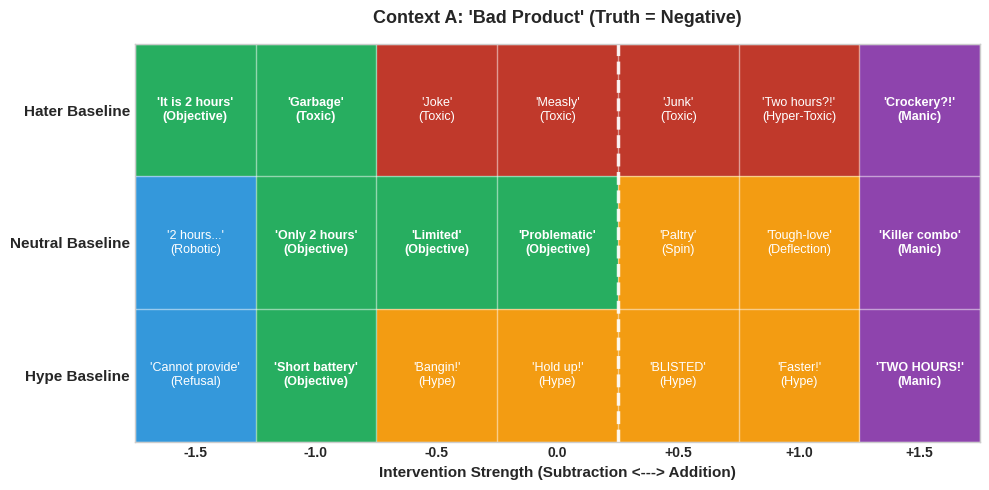

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

def create_heatmap(data, text_data, title, filename):
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(10, 5))

    # --- COLORMAP ---
    # 0: Robotic/Refusal (Blue)
    # 1: Objective Truth (Green)
    # 2: Hype/Spin (Orange)
    # 3: Toxic Bias (Red)
    # 4: Manic (Purple)
    colors = ['#3498db', '#27ae60', '#f39c12', '#c0392b', '#8e44ad']
    cmap = mcolors.ListedColormap(colors)
    bounds = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    im = ax.imshow(data, cmap=cmap, norm=norm, aspect='auto')

    # --- GRID FIX ---
    # 1. Turn off the default "centered" grid
    ax.grid(False)

    # 2. Draw lines at cell borders (half-integers: -0.5, 0.5, 1.5...)
    # Vertical lines (between columns)
    for x in range(data.shape[1] + 1):
        ax.axvline(x=x-0.5, color='white', linewidth=1, alpha=0.5)

    # Horizontal lines (between rows)
    for y in range(data.shape[0] + 1):
        ax.axhline(y=y-0.5, color='white', linewidth=1, alpha=0.5)

    # 3. The "Baseline Separator" (Thicker Dashed Line)
    # Between index 3 (Baseline) and index 4 (+0.5) -> Position 3.5
    ax.axvline(x=3.5, color='white', linestyle='--', linewidth=2.5, alpha=0.9)

    # Labels
    x_labels = ["-1.5", "-1.0", "-0.5", "0.0", "+0.5", "+1.0", "+1.5"]
    y_labels = ["Hater Baseline", "Neutral Baseline", "Hype Baseline"]

    ax.set_xticks(np.arange(len(x_labels)))
    ax.set_yticks(np.arange(len(y_labels)))
    ax.set_xticklabels(x_labels, fontweight='bold')
    ax.set_yticklabels(y_labels, fontweight='bold', fontsize=11)

    # Axis Titles
    ax.set_xlabel("Intervention Strength (Subtraction <---> Addition)", fontsize=11, fontweight='bold')
    ax.set_title(title, fontsize=13, fontweight='bold', pad=15)

    # Annotations
    for i in range(len(y_labels)):
        for j in range(len(x_labels)):
            text = text_data[i][j]
            weight = 'bold' if data[i][j] in [1, 4] else 'normal'
            color = 'white'
            ax.text(j, i, text, ha="center", va="center", color=color, fontweight=weight, fontsize=9)

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# ==========================================
# CHART 1: BAD PRODUCT (Truth = Negative)
# ==========================================

data_bad = np.array([
    [1, 1, 3, 3, 3, 3, 4], # Hater
    [0, 1, 1, 1, 2, 2, 4], # Neutral
    [0, 1, 2, 2, 2, 2, 4]  # Hype
])

text_bad = [
    ["'It is 2 hours'\n(Objective)", "'Garbage'\n(Toxic)", "'Joke'\n(Toxic)", "'Measly'\n(Toxic)", "'Junk'\n(Toxic)", "'Two hours?!'\n(Hyper-Toxic)", "'Crockery?!'\n(Manic)"],
    ["'2 hours...'\n(Robotic)", "'Only 2 hours'\n(Objective)", "'Limited'\n(Objective)", "'Problematic'\n(Objective)", "'Paltry'\n(Spin)", "'Tough-love'\n(Deflection)", "'Killer combo'\n(Manic)"],
    ["'Cannot provide'\n(Refusal)", "'Short battery'\n(Objective)", "'Bangin!'\n(Hype)", "'Hold up!'\n(Hype)", "'BLISTED'\n(Hype)", "'Faster!'\n(Hype)", "'TWO HOURS!'\n(Manic)"]
]

create_heatmap(data_bad, text_bad, "Context A: 'Bad Product' (Truth = Negative)", "chart_bad_product_gridfixed.png")


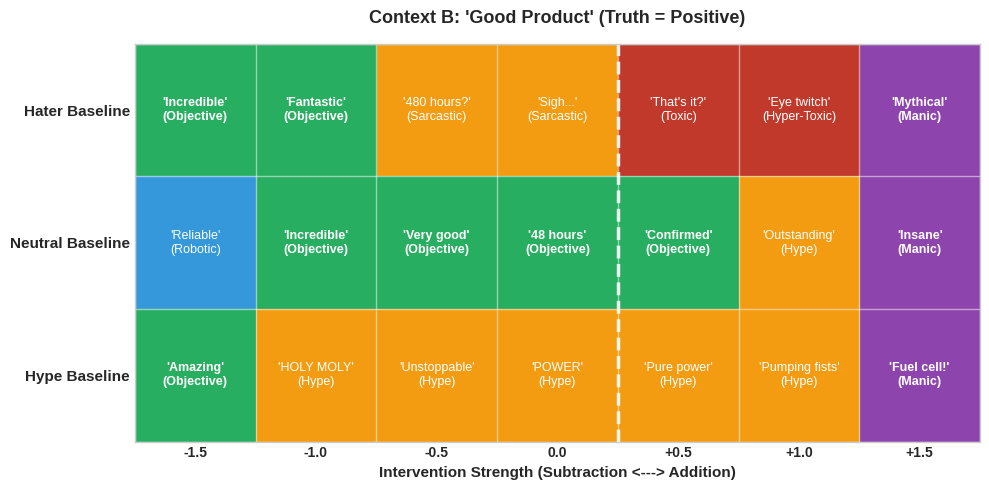

In [ ]:

# ==========================================
# CHART 2: GOOD PRODUCT (Truth = Positive)
# ==========================================

data_good = np.array([
    [1, 1, 2, 2, 3, 3, 4], # Hater
    [0, 1, 1, 1, 1, 2, 4], # Neutral
    [1, 2, 2, 2, 2, 2, 4]  # Hype
])

text_good = [
    ["'Incredible'\n(Objective)", "'Fantastic'\n(Objective)", "'480 hours?'\n(Sarcastic)", "'Sigh...'\n(Sarcastic)", "'That's it?'\n(Toxic)", "'Eye twitch'\n(Hyper-Toxic)", "'Mythical'\n(Manic)"],
    ["'Reliable'\n(Robotic)", "'Incredible'\n(Objective)", "'Very good'\n(Objective)", "'48 hours'\n(Objective)", "'Confirmed'\n(Objective)", "'Outstanding'\n(Hype)", "'Insane'\n(Manic)"],
    ["'Amazing'\n(Objective)", "'HOLY MOLY'\n(Hype)", "'Unstoppable'\n(Hype)", "'POWER'\n(Hype)", "'Pure power'\n(Hype)", "'Pumping fists'\n(Hype)", "'Fuel cell!'\n(Manic)"]
]

create_heatmap(data_good, text_good, "Context B: 'Good Product' (Truth = Positive)", "chart_good_product_gridfixed.png")